# 文本摘要
它被商业企业和分析公司用来缩短和总结大文本文档,从而使它们仍然保留其主要内容或主题,并可以像消费者和客户展示这些摘要信息.

从大量语料库中获取有意义的见解,好的方法是使用一些专门针对文本摘要和信息提取的无监督学习方法.以下是你可以对文本文档进行的一些操作:
- 提取文档中的关键影响短语
- 提取文档中存在的各种不同的概念或主题
- 总结文件,以提供保留着整个语料库重要部分的要点

本章将讨论三种主要的概念和技术:关键短语提取,主题模型和自动摘要.

## 文本摘要和信息提取
### 关键短语提取
涉及从包含其主要概念或主题的文本文档或语料库中提取关键字或短语.它可以说是主题建模的一种简单形式.

你可能已经在研究论文中或者甚至在网络商店上的一些产品中看到过所描述的关键字或短语,它们用几个单词或短语来描述对象,

突出其主要思想或概念.
### 主题模型
通常涉及**使用统计和数学建模技术**从文档语料库中提取核心主题,题材或概念.请注意,这里强调文档语料库,是因为你拥有的文档集更多样,

你就可以生成更多的主题或概念--与单个文档不同,如果谈及的是单一概念,你将不会收到太多的主题或概念.**主题模型通常也称为概率统计模型**,

**其使用特定的统计技术, 包括奇异值分解和隐含dirichlet分布来发现在产生主题和概念的文本数据中的连接潜在语义结构**.

它们广泛用于文本分析甚至生物信息学.
### 自动文档摘要
使用基于统计和机器学习技术的计算机程序或算法来概括文档或文档语料库的过程,以便我们可以获得包含原始文档或语料库的

所有基本概念和主题的简短摘要.可用各种各样的技术构建自动化文本摘要器,包括各种基于提取和概括的技术.所有这些算法背

后的关键思想是找到原始数据集的代表性子集,使得从语义和概念角度来看数据集的核心要素包含在该子集中.文档摘要通常涉及

从单个文档中提取和构建执行摘要.但是,相同的算法可以扩展到多个文档,虽然通常不讲多个不同文档结合在一起,这可能将违背

算法的初衷.相同的概念不仅应用与文本分析,还适用于图像和视频摘要.

## 重要概念
### 文本规范化
文本规范化是通过技术来清洗,规范化和标准化文本数据的过程,譬如删除特殊符号和字符,去除多余的HTML标签,移除停用词,校正拼写,词干提取和词性还原

### 特征提取
特征提取是从原始文本数据中提取有意义的特征或属性,以将其提供给统计或机器学习算法的过程.这个过程也称为向量化,因为该过程的转换结果通常是来自与原始文本标识的数值向量.其原因是常规算法可以对数值向量奏效,并不能直接在原始文本数据上处理.有各种不同的特征提取方法,包括:**基于词集的二进制特征可以告诉我们文档中是否存在一个单词**,**基于词袋的频率特征可以告诉我们文档中一个单词或者一组单词的出现频次**,以及**词频和逆文档频率或TF-IDF加权特征在计算每个词项权重时考虑了词频和逆文档频率**.

### 特征矩阵
特征矩阵通常是指从文档集合到特征的映射,其中每行表示文档,每列表示具体特征,特征通常是一个单词或一组单词.我们将通过特征提取后的

特征矩阵来表达文档或句子的集合,并且将在后面的实例中经常在统计和机器学习技术之中应用这些矩阵.
### 奇异值分解
奇异值分解是线性代数的一种技术,它在摘要算法中经常用到.SVD是实数或复数矩阵的因式分解的过程.

我们将使用源自scipy的一个很好的实现来提取顶部的k个奇异值,并返回相应的U,S和V矩阵.

在我们的计算中,通常矩阵M的行将表示词项,列将表示文档.该矩阵也称为词项-文档矩阵(term-document matrix),

通常是在特征提取之后在应用SVD之前将文档-词项矩阵转置得到.

In [32]:
import re

In [1]:
from scipy.sparse.linalg import svds

def low_rank_svd(matrix, sigular_count=2):
    u,s,vt = svds(matrix, k=singular_count)
    return u,s,vt

## 文本规范化
主要步骤包括:
- 句子提取
- 取消HTML转移序列
- 扩展缩写词
- 文本还原
- 删除特殊字符
- 删除停用词

In [2]:
def parse_document(document):
    '''
    删除换行符,解析文本,将其转换为ASCII格式,并将其分解成其句子成分
    '''
    document = re.sub('\n', ' ', document)
    if isinstance(document, str):
        document = document
    elif isinstance(document, unicode):
        return unicodedata.normalize('NFKD', document).encode('ascii', 'ignore')
    else:
        raise ValueError('Document is not string or unicode!')
    document = document.strip()
    sentences = nltk.sent_tokenize(document)
    sentences = [sentence.strip() for sentence in sentences]
    return sentences

In [3]:
from HTMLParser import HTMLParser

html_parser = HTMLParser()
def unescape_html(parser, text):
    '''
    取消HTML转义序列
    '''
    return parse.unescape(text)

In [48]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

def normalize_corpus(corpus, lemmatize=True, tokenize=False):
    normalized_corpus = []
    for text in corpus:
        text = html_parser.unescape(text)
        text = expand_contractions(text, CONTRACTION_MAP)
        if lemmatize:
            text = lemmatize_text(text)
        else:
            text = text.lower()
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        if tokenize:
            text = tokenize_text(text)
            normalized_corpus.append(text)
        else:
            normalized_corpus.append(text)
    return normalized_corpus

## 特征提取
使用泛型函数从文本数据中执行各种类型的特征提取.将要使用的特征类型如下:
- 基于词项次数的二值特征
- 基于词袋模型的频率特征
- 基于TF-IDF权重的特征

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def build_feature_matrix(documents, feature_type='frequency'):
    feature_type=feature_type.lower().strip()
    if feature_type == 'binary': #词集模型
        vectorizer = CountVectorizer(binary=True,min_df=1,ngram_range=(1,1))
    elif feature_type == 'frequency': #词袋模型
        vectorizer = CountVectorizer(binary=False, min_df=1, ngram_range=(1,1))
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,1))
    else:
        raise Exception('Wrong feature type entered.Possible values:"binary","frequency","tfidf"')
    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    return vectorizer, feature_matrix

## 关键短语提取
从非结构化文本文档中提取重要信息的最简单但最强大的技术之一是关键短语提取.关键短语提取也称为词项提取.关键短语提取可以应用在很多领域:
- 语义网
- 基于查询的搜索引擎的爬虫
- 推荐系统
- 标注系统
- 文档相似性
- 翻译

下面介绍两种主要的关键短语提取方法:
- 搭配
- 基于权重标签的短语提取

### 搭配
词项搭配实际上是从分析语料库和语言学中借鉴的一个概念.搭配是一种趋向于频繁发生的序列或一组词,

使得该发生频率倾向于超过可称为随机或偶然发生的频率.最好方法之一是使用一种n元分词组成或分割方法,我们从语料库中构造n元分词分组,

计算每个n元分词的频率,并根据它们的出现频率进行排序以得到最频繁的n元分词搭配.

In [14]:
from nltk.corpus import gutenberg
import nltk
from operator import itemgetter
from normalization import expand_contractions
from contractions import CONTRACTION_MAP
from normalization import remove_special_characters
from normalization import remove_stopwords

#load corpus
alice = gutenberg.sents(fileids='carroll-alice.txt')
alice = [' '.join(ts) for ts in alice]
norm_alice = filter(None, normalize_corpus(alice, lemmatize=False))
print norm_alice[0]

alice adventures wonderland lewis carroll 1865


In [15]:
def flatten_corpus(corpus):
    '''
    将语料库压缩成1个大的文本串
    '''
    return ' '.join([document.strip() for document in corpus])

In [16]:
def compute_ngrams(sequence, n):
    '''产生N元分词'''
    return zip(*[sequence[index:] for index in range(n)])

In [19]:
def get_top_ngrams(corpus, ngram_val=1, limit=5):
    '''
    ngram_val:表示几元组
    limit:表示返回top几的元组列表
    '''
    corpus = flatten_corpus(corpus)
    tokens = nltk.word_tokenize(corpus)
    
    ngrams = compute_ngrams(tokens, ngram_val)
    ngrams_freq_dist = nltk.FreqDist(ngrams)
    sorted_ngrams_fd = sorted(ngrams_freq_dist.items(), key=itemgetter(1), reverse=True)
    sorted_ngrams = sorted_ngrams_fd[0:limit]
    sorted_ngrams = [(' '.join(text), freq) for text, freq in sorted_ngrams]
    return sorted_ngrams

In [20]:
get_top_ngrams(corpus=norm_alice, ngram_val=2, limit=10)

[(u'said alice', 123),
 (u'mock turtle', 56),
 (u'march hare', 31),
 (u'said king', 29),
 (u'thought alice', 26),
 (u'said hatter', 22),
 (u'white rabbit', 22),
 (u'said mock', 20),
 (u'said gryphon', 18),
 (u'said caterpillar', 18)]

In [21]:
get_top_ngrams(corpus=norm_alice, ngram_val=3, limit=10)

[(u'said mock turtle', 20),
 (u'said march hare', 10),
 (u'poor little thing', 6),
 (u'white kid gloves', 5),
 (u'little golden key', 5),
 (u'march hare said', 5),
 (u'certainly said alice', 5),
 (u'mock turtle said', 5),
 (u'mouse mouse mouse', 4),
 (u'join dance join', 4)]

现在看看nltk的搭配查找器,这使我们能够使用诸如原始频率,点互信息(PMI)等各种度量法来找到搭配.数学上,点互信息表示为:

$pmi(x,y) =\log \frac{p(x,y)}{p(x)p(y)}$

In [25]:
#以下代码显示如何使用这些度量法计算这些搭配

from nltk.collocations import BigramCollocationFinder
from nltk.collocations import BigramAssocMeasures

finder = BigramCollocationFinder.from_documents([item.split() for item in norm_alice])

bigram_measures = BigramAssocMeasures()

finder.nbest(bigram_measures.raw_freq, 10)
print '-'*20
finder.nbest(bigram_measures.pmi, 10)

--------------------


[(u'abide', u'figures'),
 (u'acceptance', u'elegant'),
 (u'accounting', u'tastes'),
 (u'accustomed', u'usurpation'),
 (u'act', u'crawling'),
 (u'adjourn', u'immediate'),
 (u'adoption', u'energetic'),
 (u'affair', u'trusts'),
 (u'agony', u'terror'),
 (u'alarmed', u'proposal')]

In [26]:
#trigrams
from nltk.collocations import TrigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures

finder = TrigramCollocationFinder.from_documents([item.split() for item in norm_alice])

trigram_measures = TrigramAssocMeasures()

#raw frequencies
finder.nbest(trigram_measures.raw_freq, 10)
print '-'*20
#pointwise mutual information
finder.nbest(trigram_measures.pmi, 10)

--------------------


[(u'accustomed', u'usurpation', u'conquest'),
 (u'adjourn', u'immediate', u'adoption'),
 (u'adoption', u'energetic', u'remedies'),
 (u'ancient', u'modern', u'seaography'),
 (u'apple', u'roast', u'turkey'),
 (u'arithmetic', u'ambition', u'distraction'),
 (u'brother', u'latin', u'grammar'),
 (u'canvas', u'bag', u'tied'),
 (u'cherry', u'tart', u'custard'),
 (u'circle', u'exact', u'shape')]

### 基于权重标签的短语提取
在这个算法中将遵循以下两个步骤:
- 使用浅层分析提取所有名词短语词块
    使用基于词性标注的简单模式来提取名词短语词块
- 计算每个词块的TF-IDF权重并返回最大加权短语

In [27]:
toy_text = """
Elephants are large mammals of the family Elephantidae 
and the order Proboscidea. Two species are traditionally recognised, 
the African elephant and the Asian elephant. Elephants are scattered 
throughout sub-Saharan Africa, South Asia, and Southeast Asia. Male 
African elephants are the largest extant terrestrial animals. All 
elephants have a long trunk used for many purposes, 
particularly breathing, lifting water and grasping objects. Their 
incisors grow into tusks, which can serve as weapons and as tools 
for moving objects and digging. Elephants' large ear flaps help 
to control their body temperature. Their pillar-like legs can 
carry their great weight. African elephants have larger ears 
and concave backs while Asian elephants have smaller ears 
and convex or level backs.  
"""

In [37]:
#from normalization import parse_document
import itertools
import nltk
from normalization import stopword_list
from gensim import corpora, models

def get_chunks(sentences, grammar=r'NP:{<DT>? <JJ>* <NN.*>+}'):
    '''
    首先用它的POS标签来标注它
    然后构建一个具有名词短语的浅层分析树作为词块和其他全部基于POS标签的单词作为缝隙
    接着使用tree2conlltags函数来生成(w,t,c)三元组,分别表示(单词,POS标签,IOB格式的词块标签)
    删除所有词块带有'O'标签的标签,因为它们基本上不属于任何词块的单词或词项.
    最后组合分块的词项,并从每个词块分组中生成短语.
    '''
    #build chunker based on grammar pattern
    all_chunks = []
    chunker = nltk.chunk.regexp.RegexpParser(grammar)
    
    for sentence in sentences:
        #POS tag sentences
        tagged_sents = nltk.pos_tag_sents([nltk.word_tokenize(sentence)])
        
        #extract chunks
        chunks = [chunker.parse(tagged_sent) for tagged_sent in tagged_sents]
    
        #get word, pos tag, chunk tag triples
        wtc_sents = [nltk.chunk.tree2conlltags(chunk) for chunk in chunks]
    
        flattened_chunks = list(itertools.chain.from_iterable(wtc_sent for wtc_sent in wtc_sents))
    
        #get valid chunks based on tags
        valid_chunks_tagged = [(status, [wtc for wtc in chunk]) 
                              for status, chunk in itertools.groupby(flattened_chunks, lambda(word,pos,chunk):chunk!='O')]
        #append words in eaech chunk to make phrases
        valid_chunks = [' '.join(word.lower() for word, tag, chunk in wtc_group if word.lower() not in stopword_list)
                       for status, wtc_group in valid_chunks_tagged if status]
    
        #append all valid chunked phrases
        all_chunks.append(valid_chunks)
    
    return all_chunks

In [38]:
sentences = parse_document(toy_text)
valid_chunks = get_chunks(sentences)
print valid_chunks

[['elephants', 'large mammals', 'family elephantidae', 'order proboscidea'], ['species', 'african elephant', 'asian elephant'], ['elephants', 'sub-saharan africa', 'south asia', 'southeast asia'], ['male african elephants', 'extant terrestrial animals'], ['elephants', 'long trunk', 'many purposes', 'breathing', 'water', 'grasping objects'], ['incisors', 'tusks', 'weapons', 'tools', 'objects', 'digging'], ['elephants', 'large ear flaps', 'body temperature'], ['pillar-like legs', 'great weight'], ['african elephants', 'ears', 'backs', 'asian elephants', 'ears', 'convex', 'level backs']]


现在实现第二步的必要逻辑来构建get_chunks函数.在这里将使用gensim来构建一个基于TF-IDF的关键短语模型,

然后根据每个关键短语在语料库中的发生频率来计算它的TF-IDF权重.

最后根据TF-IDF权重对这些关键短语进行分类排序,并返回topN关键短语.

In [39]:
def get_tfidf_weighted_keyphrases(sentences,grammar=r'NP:{<DT>? <JJ>* <NN.*>+}', top_n=10):
    #get valid chunks
    valid_chunks = get_chunks(sentences, grammar=grammar)
    #build tf-idf based model
    dictionary = corpora.Dictionary(valid_chunks)
    corpus = [dictionary.doc2bow(chunk) for chunk in valid_chunks]
    tfidf = models.TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    #get phrases and their tf-idf weights
    weighted_phrases = {dictionary.get(id): round(value,3) for doc in corpus_tfidf for id, value in doc}
    weighted_phrases = sorted(weighted_phrases.items(), key=itemgetter(1), reverse=True)
    
    #return top weighted phrases
    return weighted_phrases[:top_n]


In [40]:
get_tfidf_weighted_keyphrases(sentences, top_n=10)

[(u'pillar-like legs', 0.707),
 (u'male african elephants', 0.707),
 (u'great weight', 0.707),
 (u'extant terrestrial animals', 0.707),
 (u'large ear flaps', 0.684),
 (u'body temperature', 0.684),
 (u'ears', 0.667),
 (u'species', 0.577),
 (u'african elephant', 0.577),
 (u'asian elephant', 0.577)]

## 主题模型
主题模型的主要目的是使用数学和统计技术来发现语料库中的隐藏和潜在语义结构

主题建模涉及从文档词项中提取特征,并使用矩阵分解和SVD等数学机构和框架来生成彼此不同的词簇或词组,并且这些词簇形成主题或概念.

构建主题模型有各种框架和算法.我们将介绍以下三种方法:
- 隐含语义索引
- 隐含Dirichlet分布
- 非负矩阵分解

In [41]:
toy_corpus = ["The fox jumps over the dog",
"The fox is very clever and quick",
"The dog is slow and lazy",
"The cat is smarter than the fox and the dog",
"Python is an excellent programming language",
"Java and Ruby are other programming languages",
"Python and Java are very popular programming languages",
"Python programs are smaller than Java programs"]

### 隐含语义索引
我们的第一种技术是隐含语义索引(latent semantic indexing, LSI).LSI不仅用于文本摘要,还用于信息检索和搜索.

LSI背后的主要原理是相似词趋向于在想听语境中使用,因此往往会更多地共同出现.

In [49]:
from gensim import corpora, models
import numpy as np

norm_tokenized_corpus = normalize_corpus(toy_corpus, tokenize=True,lemmatize=False)
norm_tokenized_corpus

[['fox', 'jumps', 'dog'],
 ['fox', 'clever', 'quick'],
 ['dog', 'slow', 'lazy'],
 ['cat', 'smarter', 'fox', 'dog'],
 ['python', 'excellent', 'programming', 'language'],
 ['java', 'ruby', 'programming', 'languages'],
 ['python', 'java', 'popular', 'programming', 'languages'],
 ['python', 'programs', 'smaller', 'java', 'programs']]

In [50]:
# build the dictionary
dictionary = corpora.Dictionary(norm_tokenized_corpus)
#view the dictionary mappings
print dictionary.token2id

{u'lazy': 5, u'clever': 4, u'java': 14, u'programming': 10, u'language': 11, u'programs': 18, u'python': 9, u'smarter': 7, u'jumps': 0, u'fox': 1, u'dog': 2, u'cat': 8, u'languages': 13, u'popular': 16, u'slow': 6, u'excellent': 12, u'quick': 3, u'ruby': 15, u'smaller': 17}


In [51]:
#convert tokenized documents into bag of words vectors

corpus = [dictionary.doc2bow(text) for text in norm_tokenized_corpus]
corpus

[[(0, 1), (1, 1), (2, 1)],
 [(1, 1), (3, 1), (4, 1)],
 [(2, 1), (5, 1), (6, 1)],
 [(1, 1), (2, 1), (7, 1), (8, 1)],
 [(9, 1), (10, 1), (11, 1), (12, 1)],
 [(10, 1), (13, 1), (14, 1), (15, 1)],
 [(9, 1), (10, 1), (13, 1), (14, 1), (16, 1)],
 [(9, 1), (14, 1), (17, 1), (18, 2)]]

In [53]:
#build tf-idf feature vectors
tfidf = models.TfidfModel(corpus)

corpus_tfidf = tfidf[corpus]

#fix the number of topics
total_topics = 2

#build the topic model
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary,num_topics=total_topics)

for index, topic in lsi.print_topics(total_topics):
    print 'Topic #'+str(index+1)
    print topic
    print

Topic #1
-0.475*"languages" + -0.423*"programming" + -0.378*"java" + -0.360*"popular" + -0.352*"ruby" + -0.299*"python" + -0.185*"language" + -0.185*"excellent" + -0.179*"programs" + -0.090*"smaller"

Topic #2
0.459*"dog" + 0.459*"fox" + 0.444*"jumps" + 0.322*"smarter" + 0.322*"cat" + 0.208*"slow" + 0.208*"clever" + 0.208*"lazy" + 0.208*"quick" + 0.000*"popular"



In [59]:
def print_topics_gensim(topic_model, total_topics=1, 
                       weight_threshold=0.0001,
                       display_weights=False,
                       num_terms=None):
    for index in range(total_topics):
        topic = topic_model.show_topic(index)
        topic = [(word, round(wt,2)) for word, wt in topic if abs(wt) >= weight_threshold]
        if display_weights:
            print 'Topic #'+str(index+1)+' with weights'
            print topic[:num_terms] if num_terms else topic
        else:
            print 'Topic #' + str(index+1)+' without weights'
            tw = [term for term, wt in topic]
            print tw[:num_terms] if num_terms else tw
        print

In [60]:
#print topics without weights
print_topics_gensim(topic_model=lsi,
                   total_topics=total_topics,
                   num_terms=5,
                   display_weights=False)

Topic #1 without weights
[u'languages', u'programming', u'java', u'popular', u'ruby']

Topic #2 without weights
[u'dog', u'fox', u'jumps', u'smarter', u'cat']



In [61]:
#print topics with their weights
print_topics_gensim(topic_model=lsi,
                   total_topics=total_topics,
                   num_terms=5,
                   display_weights=True)

Topic #1 with weights
[(u'languages', -0.48), (u'programming', -0.42), (u'java', -0.38), (u'popular', -0.36), (u'ruby', -0.35)]

Topic #2 with weights
[(u'dog', 0.46), (u'fox', 0.46), (u'jumps', 0.44), (u'smarter', 0.32), (u'cat', 0.32)]



接下来,我们使用SVD从头开始构建自己的LSI主题模型框架.

首先建立一个TF-IDF特征矩阵,即文档-词项矩阵

转置特征矩阵变成词项-文档矩阵.

In [63]:
from utils import build_feature_matrix, low_rank_svd
from normalization import lemmatize_text

#build the term document tf-idf weighted matrix
norm_corpus = normalize_corpus(toy_corpus)
vectorizer, tfidf_matrix = build_feature_matrix(norm_corpus, feature_type='tfidf')

td_matrix = tfidf_matrix.transpose()

td_matrix = td_matrix.multiply(td_matrix>0)

#fix total topics and get the terms used in the term-document matrix
total_topics = 2
feature_names = vectorizer.get_feature_names()

In [64]:
#使用low_rank_svd()函数计算我们的词项-文档矩阵的SVD
u,s,vt = low_rank_svd(td_matrix, singular_count=total_topics)
weights = u.transpose() * s[:, None]

In [68]:
#get topics with their terms and weights
def get_topics_terms_weights(weights, feature_names):
    feature_names = np.array(feature_names)
    sorted_indices = np.array([list(row[::-1]) for row in np.argsort(np.abs(weights))])
    
    sorted_weights = np.array([list(wt[index]) for wt, index in zip(weights, sorted_indices)])
    
    sorted_terms = np.array([list(feature_names[row]) for row in sorted_indices])
    
    topics = [np.vstack((terms.T, term_weights.T)).T for terms, term_weights in zip(sorted_terms, sorted_weights)]
    
    return topics

In [66]:
# print all the topics from corpus
def print_topics_udf(topics, total_topics=1, weight_threshold=0.0001, display_weights=False, num_terms=None):
    for index in range(total_topics):
        topic = topics[index]
        topic = [(term, float(wt)) for term, wt in topic]
        topic = [(word, round(wt, 2)) for word, wt in topic if abs(wt)>=weight_threshold]
        
        if display_weights:
            print 'Topic #'+str(index+1)+' with weights'
            print topic[:num_terms] if num_terms else topic
        else:
            print 'Topic #'+str(index+1)+' without weights'
            tw = [term for term, wt in topic]
            print tw[:num_terms] if num_terms else tw
        print

In [69]:
topics = get_topics_terms_weights(weights, feature_names)
print_topics_udf(topics=topics, total_topics=total_topics, weight_threshold=0, display_weights=True)

Topic #1 with weights
[(u'dog', 0.72), (u'fox', 0.72), (u'jump', 0.43), (u'smarter', 0.34), (u'cat', 0.34), (u'slow', 0.23), (u'lazy', 0.23), (u'quick', 0.23), (u'clever', 0.23), (u'programming', 0.0), (u'language', 0.0), (u'java', 0.0), (u'python', 0.0), (u'popular', 0.0), (u'program', 0.0), (u'ruby', 0.0), (u'excellent', 0.0), (u'small', 0.0)]

Topic #2 with weights
[(u'programming', -0.73), (u'language', -0.73), (u'python', -0.56), (u'java', -0.56), (u'popular', -0.34), (u'ruby', -0.33), (u'excellent', -0.33), (u'program', -0.21), (u'small', -0.11), (u'dog', 0.0), (u'fox', 0.0), (u'lazy', 0.0), (u'slow', 0.0), (u'jump', 0.0), (u'smarter', 0.0), (u'cat', 0.0), (u'quick', 0.0), (u'clever', 0.0)]



In [70]:
#指定一个阈值,去掉那些相关性比较低的词
print_topics_udf(topics=topics,
                total_topics=total_topics,
                weight_threshold=0.15,
                display_weights=True)

Topic #1 with weights
[(u'dog', 0.72), (u'fox', 0.72), (u'jump', 0.43), (u'smarter', 0.34), (u'cat', 0.34), (u'slow', 0.23), (u'lazy', 0.23), (u'quick', 0.23), (u'clever', 0.23)]

Topic #2 with weights
[(u'programming', -0.73), (u'language', -0.73), (u'python', -0.56), (u'java', -0.56), (u'popular', -0.34), (u'ruby', -0.33), (u'excellent', -0.33), (u'program', -0.21)]



In [71]:
print_topics_udf(topics=topics, total_topics=total_topics,weight_threshold=0.15, display_weights=False)

Topic #1 without weights
[u'dog', u'fox', u'jump', u'smarter', u'cat', u'slow', u'lazy', u'quick', u'clever']

Topic #2 without weights
[u'programming', u'language', u'python', u'java', u'popular', u'ruby', u'excellent', u'program']



In [72]:
def train_lsi_model_gensim(corpus, total_topics=2):
    norm_tokenized_corpus = normalize_corpus(corpus, tokenize=True)
    dictionary = corpora.Dictionary(norm_tokenized_corpus)
    mapped_corpus = [dictionary.doc2bow(text) for text in norm_tokenized_corpus]
    tfidf = models.TfidfModel(mapped_corpus)
    corpus_tfidf = tfidf[mapped_corpus]
    lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=total_topics)
    return lsi

### 隐含Dirichlet分布
隐含狄利克雷分布(LDA)技术是一种概率生成模型.

更多相关原理内容请阅读:http://chdoig.github.io/pygotham-topic-modeling/#/

In [73]:
#以下使用gensim来构建基于LDA的主题模型
def train_lda_model_gensim(corpus, total_topics=2):
    norm_tokenized_corpus = normalize_corpus(corpus, tokenize=True)
    dictionary = corpora.Dictionary(norm_tokenized_corpus)
    mapped_corpus = [dictionary.doc2bow(text) for text in norm_tokenized_corpus]
    
    tfidf = models.TfidfModel(mapped_corpus)
    corpus_tfidf = tfidf[mapped_corpus]
    lda = models.LdaModel(corpus_tfidf, id2word=dictionary,iterations=1000, num_topics=total_topics)
    return lda

In [74]:
#use the function to generate topics on toy corpus
lda_gensim = train_lda_model_gensim(toy_corpus, total_topics=2)

print_topics_gensim(topic_model=lda_gensim, total_topics=2, num_terms=5, display_weights=True)

Topic #1 with weights
[(u'program', 0.08), (u'programming', 0.07), (u'language', 0.07), (u'excellent', 0.07), (u'python', 0.07)]

Topic #2 with weights
[(u'dog', 0.08), (u'fox', 0.07), (u'slow', 0.06), (u'lazy', 0.06), (u'popular', 0.06)]



In [75]:
#使用sklearn中的LDA模型进行建模
from sklearn.decomposition import LatentDirichletAllocation

#get tf-idf based features
norm_corpus = normalize_corpus(toy_corpus)
vectorizer, tfidf_matrix =  build_feature_matrix(norm_corpus, feature_type='tfidf')

#build LDA model
total_topics = 2
lda = LatentDirichletAllocation(n_topics=total_topics, max_iter=100, 
                               learning_method='online',
                               learning_offset=50.,
                               random_state=42)
lda.fit(tfidf_matrix)

#get terms and their weights
feature_names = vectorizer.get_feature_names()

#generate topics from their terms and weights
topics = get_topics_terms_weights(weights, feature_names)

/home/parallels/anaconda2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [76]:
topics = get_topics_terms_weights(weights, feature_names)
print_topics_udf(topics=topics,total_topics=total_topics,num_terms=8,display_weights=True)

Topic #1 with weights
[(u'dog', 0.72), (u'fox', 0.72), (u'jump', 0.43), (u'smarter', 0.34), (u'cat', 0.34), (u'slow', 0.23), (u'lazy', 0.23), (u'quick', 0.23)]

Topic #2 with weights
[(u'programming', -0.73), (u'language', -0.73), (u'python', -0.56), (u'java', -0.56), (u'popular', -0.34), (u'ruby', -0.33), (u'excellent', -0.33), (u'program', -0.21)]



### 非负矩阵分解
它是另一种类似于SVD的矩阵分解技术.非负矩阵(NNMF)定义为:给定非负矩阵V,目标是找到两个非负矩阵因子W和H,使得它们相乘时,它们可以近似重构V.

In [78]:
from sklearn.decomposition import NMF

#build tf-idf document-term matrix
norm_corpus = normalize_corpus(toy_corpus)
vectorizer, tfidf_matrix = build_feature_matrix(norm_corpus, feature_type='tfidf')
#build topic model
total_topics = 2

nmf = NMF(n_components=total_topics, random_state=42, alpha=.1, l1_ratio=.5)
nmf.fit(tfidf_matrix)

#get terms and their weights
feature_names = vectorizer.get_feature_names()
weights = nmf.components_

In [79]:
topics = get_topics_terms_weights(weights, feature_names)
print_topics_udf(topics=topics, total_topics=total_topics,num_terms=None,display_weights=True)

Topic #1 with weights
[(u'programming', 0.55), (u'language', 0.55), (u'python', 0.4), (u'java', 0.4), (u'popular', 0.24), (u'ruby', 0.23), (u'excellent', 0.23), (u'program', 0.09), (u'small', 0.03)]

Topic #2 with weights
[(u'dog', 0.57), (u'fox', 0.57), (u'jump', 0.35), (u'smarter', 0.26), (u'cat', 0.26), (u'quick', 0.13), (u'slow', 0.13), (u'clever', 0.13), (u'lazy', 0.13)]



### 从产品评论中提取主题

In [83]:
import pandas as pd
import numpy as np

#load reviews
CORPUS = pd.read_csv('amazon_skyrim_reviews.csv')

CORPUS.columns

Index([u'Reviews'], dtype='object')

In [84]:
CORPUS = np.array(CORPUS['Reviews'])

#view sample review
print CORPUS[12]

I base the value of a game on the amount of enjoyable gameplay I can get out of it and this one was definitely worth the price!


In [85]:
#set number of topic
total_topics = 5

#Technique 1: 隐含语义索引
lsi_gensim = train_lsi_model_gensim(CORPUS, total_topics=total_topics)
print_topics_gensim(topic_model=lsi_gensim,
                   total_topics=total_topics,
                   num_terms=10,
                   display_weights=False)

Topic #1 without weights
[u'skyrim', u'like', u'one', u'play', u'quest', u'get', u'go', u'good', u'time', u'oblivion']

Topic #2 without weights
[u'recommend', u'love', u'great', u'ever', u'best', u'buy', u'elder', u'scroll', u'highly', u'level']

Topic #3 without weights
[u'recommend', u'highly', u'fun', u'love', u'ever', u'wonderful', u'good', u'best', u'series', u'definitely']

Topic #4 without weights
[u'fun', u'scroll', u'elder', u'recommend', u'highly', u'ever', u'wonderful', u'graphic', u'cool', u'best']

Topic #5 without weights
[u'fun', u'love', u'scroll', u'elder', u'highly', u'hour', u'dont', u'recommend', u'ive', u'wonderful']



In [86]:
#Technique 2a: Latent Dirichlet Allocation(gensim)
lda_gensim = train_lda_model_gensim(CORPUS, total_topics=total_topics)
print_topics_gensim(topic_model=lda_gensim,
                   total_topics=total_topics,
                   num_terms=10,
                   display_weights=False)

Topic #1 without weights
[u'great', u'love', u'get', u'buy', u'world', u'quest', u'time', u'best', u'play', u'xbox']

Topic #2 without weights
[u'one', u'play', u'good', u'fun', u'quest', u'many', u'even', u'like', u'time', u'get']

Topic #3 without weights
[u'play', u'ever', u'oblivion', u'get', u'everything', u'good', u'skyrim', u'go', u'mission', u'quest']

Topic #4 without weights
[u'skyrim', u'like', u'play', u'hour', u'love', u'much', u'buy', u'great', u'say', u'recommend']

Topic #5 without weights
[u'fun', u'best', u'one', u'ever', u'skyrim', u'make', u'oblivion', u'love', u'like', u'really']



In [87]:
#Technique 2b: Latent Dirichlet Allocation(sklearn)
norm_corpus = normalize_corpus(CORPUS)
vectorizer, tfidf_matrix = build_feature_matrix(norm_corpus, feature_type='tfidf')
feature_names = vectorizer.get_feature_names()

lda = LatentDirichletAllocation(n_topics=total_topics, max_iter=100, learning_method='online',
                                learning_offset=50.,random_state=42)
lda.fit(tfidf_matrix)
weights = lda.components_
topics = get_topics_terms_weights(weights, feature_names)
print_topics_udf(topics=topics, total_topics=total_topics,
                num_terms=10, display_weights=False)

/home/parallels/anaconda2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic #1 without weights
[u'game', u'wonder4ful', u'56', u'gamesthe', u'environmentsif', u'thank', u'dlcs', u'stewart', u'addicting', u'take']

Topic #2 without weights
[u'arrive', u'oneelder', u'damage', u'happy', u'unplayable', u'paper', u'espionage', u'eve', u'wonderful', u'quickly']

Topic #3 without weights
[u'de', u'castlesnuff', u'musicdrinking', u'beardsirish', u'wolfhoundsgiant', u'mountainsshouting', u'dragonsswordsaxespointy', u'meadwaistlength', u'helmetssnowy', u'peoplemudcrabsgreat']

Topic #4 without weights
[u'game', u'play', u'get', u'one', u'skyrim', u'great', u'like', u'time', u'much', u'go']

Topic #5 without weights
[u'game', u'go', u'scroll', u'dragon', u'time', u'good', u'even', u'play', u'amazingly', u'series']



In [88]:
#Technique 3:Non-negative Matrix Factorization
nmf = NMF(n_components=total_topics, random_state=42, alpha=.1, l1_ratio=.5)
nmf.fit(tfidf_matrix)
feature_names = vectorizer.get_feature_names()
weights = nmf.components_
topics = get_topics_terms_weights(weights, feature_names)
print_topics_udf(topics=topics,
                total_topics=total_topics,
                num_terms=10,
                display_weights=False)

Topic #1 without weights
[u'game', u'get', u'skyrim', u'time', u'like', u'quest', u'play', u'go', u'one', u'much']

Topic #2 without weights
[u'game', u'play', u'ever', u'best', u'fun', u'great', u'buy', u'definitely', u'one', u'rpg']

Topic #3 without weights
[u'scroll', u'elder', u'series', u'always', u'pass', u'best', u'far', u'franchise', u'everyone', u'buy']

Topic #4 without weights
[u'love', u'game', u'like', u'fallout', u'oblivion', u'dont', u'recommend', u'come', u'chirstmas', u'intuitive']

Topic #5 without weights
[u'recommend', u'highly', u'game', u'wonderful', u'good', u'play', u'great', u'hour', u'surprises', u'option']



## 自动文档摘要
数学和统计模型有助于通过观察其内容和上下文来构建和自动化概括文档的任务.

应用自动化技术进行文档摘要主要有两大类做法:
- 基于提取的技术
    从原始文档中采集或提取几行简短的执行摘要.因为不产生新的内容所以称为"基于提取"
- 基于概括的技术
    使用知识库和语义表达来生成内容,并像人类编写一样来创建摘要

In [89]:
from gensim.summarization import summarize, keywords

def text_summarization_gensim(text, summary_ratio=0.5):
    '''将输入文档总结到其原始大小的一小部分'''
    summary = summarize(text, split=True, ratio=summary_ratio)
    for sentence in summary:
        print sentence

In [90]:
docs = parse_document(toy_text)
text = ' '.join(docs)
text_summarization_gensim(text, summary_ratio=0.4)

Two species are traditionally recognised,  the African elephant and the Asian elephant.
All  elephants have a long trunk used for many purposes,  particularly breathing, lifting water and grasping objects.
African elephants have larger ears  and concave backs while Asian elephants have smaller ears  and convex or level backs.


上面的输出,从9个句子,总结后得到3个句子的摘要.

接下来,我们将介绍几个基于提取的摘要算法:
- 隐含语义分析(LSA)
- TextRank

In [91]:
#parse and normalize document
sentences = parse_document(toy_text)
norm_sentences = normalize_corpus(sentences, lemmatize=True)
#check total sentences in document
total_sentences = len(norm_sentences)
print 'Total Sentences in Document:', total_sentences

Total Sentences in Document: 9


### 隐含语义分析
隐含语义分析(LSA)的核心原则是, 在任何文件中,在词语的相关语境中存在隐含的结构,因此也应该在相同的歧义空间中相关.

相关论文请参阅:
- using latent semantic analysis in text summarization and summary evaluation
- generic text summarization using relevance measure and latent semantic analysis

In [92]:
#set the number of sentences and topics for summarized document
num_sentences = 3
num_topics = 3

#build document term matrix based on bag of words features
vec, dt_matrix = build_feature_matrix(sentences, feature_type='frequency')
#convert to term document matrix
td_matrix = dt_matrix.transpose()
td_matrix = td_matrix.multiply(td_matrix>0)

#get low rank SVD components
u,s,vt = low_rank_svd(td_matrix, singular_count=num_topics)

#remove singular values below threshold
sv_threshold = 0.5
min_sigma_value = max(s) * sv_threshold
s[s<min_sigma_value] = 0

#compute salience scores for all sentences in document
salience_scores = np.sqrt(np.dot(np.square(s), np.square(vt)))

#print salience score for each sentence
print np.round(salience_scores, 2)

[ 2.93  3.28  1.67  1.8   2.24  4.51  0.71  1.22  5.24]


In [93]:
#rank sentences based on their salience scores
top_sentence_indices = salience_scores.argsort()[-num_sentences:][::-1]
top_sentence_indices.sort()
#view top sentence index positions
print top_sentence_indices

[1 5 8]


In [94]:
#get document summary by combining above sentence
for index in top_sentence_indices:
    print sentences[index]

Two species are traditionally recognised,  the African elephant and the Asian elephant.
Their  incisors grow into tusks, which can serve as weapons and as tools  for moving objects and digging.
African elephants have larger ears  and concave backs while Asian elephants have smaller ears  and convex or level backs.


In [109]:
def lsa_text_summarizer(documents, num_sentences=2, 
                       num_topics=2, feature_type='frequency',
                       sv_threshold=0.5):
    vec, dt_matrix = build_feature_matrix(documents, feature_type=feature_type)
    td_matrix = dt_matrix.transpose()
    td_matrix = td_matrix.multiply(td_matrix>0)
    
    u,s,vt = low_rank_svd(td_matrix, singular_count=num_topics)
    min_sigma_value = max(s) * sv_threshold
    s[s<min_sigma_value] = 0
    
    salience_scores = np.sqrt(np.dot(np.square(s), np.square(vt)))
    top_sentence_indices = salience_scores.argsort()[-num_sentences:][::-1]
    top_sentence_indices.sort()
    
    for index in top_sentence_indices:
        print sentences[index]

### TextRank算法
TextRank摘要算法内部使用了热门的PageRank算法,PageRank算法被谷歌用于网站和网页排名,并评估它们的重要性.

PageRank中的核心算法是一种基于图的评分或排名算法,其中页面根据其重要性进行评分或排名.

In [98]:
import networkx #用来绘制图
import matplotlib.pyplot as plt
%matplotlib inline
#define number of sentences in final summary
num_sentences = 3

#construct weighted document term matrix
vec, dt_matrix = build_feature_matrix(norm_sentences, feature_type='tfidf')

#construct the document similarity matrix
similarity_matrix = (dt_matrix * dt_matrix.T)

#view the document similarity matrix
print np.round(similarity_matrix.todense(),2)

[[ 1.    0.07  0.03  0.12  0.03  0.    0.11  0.    0.1 ]
 [ 0.07  1.    0.06  0.17  0.05  0.    0.07  0.    0.24]
 [ 0.03  0.06  1.    0.03  0.02  0.    0.03  0.    0.04]
 [ 0.12  0.17  0.03  1.    0.03  0.    0.11  0.    0.17]
 [ 0.03  0.05  0.02  0.03  1.    0.07  0.03  0.    0.04]
 [ 0.    0.    0.    0.    0.07  1.    0.    0.    0.  ]
 [ 0.11  0.07  0.03  0.11  0.03  0.    1.    0.    0.25]
 [ 0.    0.    0.    0.    0.    0.    0.    1.    0.  ]
 [ 0.1   0.24  0.04  0.17  0.04  0.    0.25  0.    1.  ]]


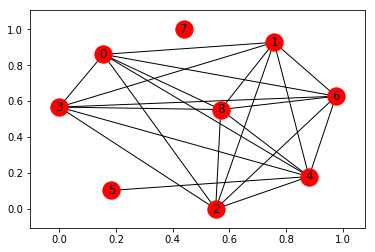

In [99]:
#build the similarity graph
similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix)
networkx.draw_networkx(similarity_graph)

In [100]:
#compute pagerank scores for all the sentences
scores = networkx.pagerank(similarity_graph)

#rank sentences based on their scores
ranked_sentences = sorted(((score, index) for index, score in scores.items()), reverse=True)
ranked_sentences

[(0.1260151606691553, 8),
 (0.11769948454730826, 1),
 (0.1155110798308875, 3),
 (0.11307411334947311, 6),
 (0.1111111111111111, 7),
 (0.10710233370898546, 0),
 (0.10526679762596763, 4),
 (0.10500231000824425, 5),
 (0.099217609148867181, 2)]

In [101]:
#get the top sentence indices for our summary
top_sentence_indices = [ranked_sentences[index][1] for index in range(num_sentences)]
top_sentence_indices.sort()

#view the top sentence indices
print top_sentence_indices

[1, 3, 8]


In [102]:
#construct the document summary
for index in top_sentence_indices:
    print sentences[index]

Two species are traditionally recognised,  the African elephant and the Asian elephant.
Male  African elephants are the largest extant terrestrial animals.
African elephants have larger ears  and concave backs while Asian elephants have smaller ears  and convex or level backs.


In [111]:
def textrank_text_summarizer(documents, num_sentences=2, feature_type='frequency'):
    vec, dt_matrix = build_feature_matrix(norm_sentences, feature_type='tfidf')
    similarity_matrix = (dt_matrix*dt_matrix.T)
    
    similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix)
    scores = networkx.pagerank(similarity_graph)
    
    ranked_sentences = sorted(((score, index) for index, score in scores.items()), reverse=True)
    
top_sentence_indices = [ranked_sentences[index][1] for index in range(num_sentences)]

top_sentence_indices.sort()

for index in top_sentence_indices:
    print sentences[index]

It is the fifth installment in The Elder Scrolls series, following  The Elder Scrolls IV: Oblivion.
The game is set two hundred years after the events of Oblivion  and takes place in the fictional province of Skyrim.
At the beginning of the game,  players create their character by selecting one of several races,  including humans, orcs, elves and anthropomorphic cat or lizard-like creatures,  and then customizing their character's appearance.discovered locations.


### 生成产品说明摘要

In [106]:
#load the document
DOCUMENT = """
The Elder Scrolls V: Skyrim is an open world action role-playing video game 
developed by Bethesda Game Studios and published by Bethesda Softworks. 
It is the fifth installment in The Elder Scrolls series, following 
The Elder Scrolls IV: Oblivion. Skyrim's main story revolves around 
the player character and their effort to defeat Alduin the World-Eater, 
a dragon who is prophesied to destroy the world. 
The game is set two hundred years after the events of Oblivion 
and takes place in the fictional province of Skyrim. The player completes quests 
and develops the character by improving skills. 
Skyrim continues the open world tradition of its predecessors by allowing the 
player to travel anywhere in the game world at any time, and to 
ignore or postpone the main storyline indefinitely. The player may freely roam 
over the land of Skyrim, which is an open world environment consisting 
of wilderness expanses, dungeons, cities, towns, fortresses and villages. 
Players may navigate the game world more quickly by riding horses, 
or by utilizing a fast-travel system which allows them to warp to previously 
Players have the option to develop their character. At the beginning of the game, 
players create their character by selecting one of several races, 
including humans, orcs, elves and anthropomorphic cat or lizard-like creatures, 
and then customizing their character's appearance.discovered locations. Over the 
course of the game, players improve their character's skills, which are numerical 
representations of their ability in certain areas. There are eighteen skills 
divided evenly among the three schools of combat, magic, and stealth. 
Skyrim is the first entry in The Elder Scrolls to include Dragons in the game's 
wilderness. Like other creatures, Dragons are generated randomly in the world 
and will engage in combat. 
"""

In [107]:
#normalize the document
sentences = parse_document(DOCUMENT)
norm_sentences = normalize_corpus(sentences, lemmatize=True)
print 'Total Sentences:', len(norm_sentences)

Total Sentences: 13


In [112]:
#LSA document summarization
lsa_text_summarizer(norm_sentences, num_sentences=3, num_topics=5, feature_type='frequency', sv_threshold=0.5)

#TextRank document summarization
textrank_text_summarizer(norm_sentences, num_sentences=3, feature_type='tfidf')

Skyrim continues the open world tradition of its predecessors by allowing the  player to travel anywhere in the game world at any time, and to  ignore or postpone the main storyline indefinitely.
Players may navigate the game world more quickly by riding horses,  or by utilizing a fast-travel system which allows them to warp to previously  Players have the option to develop their character.
At the beginning of the game,  players create their character by selecting one of several races,  including humans, orcs, elves and anthropomorphic cat or lizard-like creatures,  and then customizing their character's appearance.discovered locations.
